In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import seaborn as sns
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import zipfile

In [3]:
path=os.getcwd()
path

'C:\\Users\\aakha\\Downloads'

In [7]:
with zipfile.ZipFile("JellyFish.zip","r") as zip_ref:
    zip_ref.extractall("Dataset")

In [11]:
TEST_DIR = r"C:\Users\aakha\Downloads\Dataset\Train_Test_Valid\test"
TRAIN_DIR = r"C:\Users\aakha\Downloads\Dataset\Train_Test_Valid\Train"
VALID_DIR = r"C:\Users\aakha\Downloads\Dataset\Train_Test_Valid\valid"

In [5]:
def generate_csv(data_dir, csv_filename):
    file_paths = []
    labels = []

    # Iterate through each subdirectory (assuming each subdirectory represents a class)
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        if os.path.isdir(label_dir):
            # Iterate through each file in the subdirectory
            for file_name in os.listdir(label_dir):
                # Append file path and corresponding label
                file_paths.append(os.path.join(label_dir, file_name))
                labels.append(label)

    # Create DataFrame with file paths and labels
    df = pd.DataFrame({'File_Path': file_paths, 'Label': labels})

    # Save DataFrame to CSV file
    df.to_csv(csv_filename, index=False)

# Generate CSV files for train and test data
generate_csv(TRAIN_DIR, 'train.csv')
generate_csv(TEST_DIR, 'test.csv')

data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

print(data_train)

                                             File_Path             Label
0    C:\Users\aakha\Downloads\Dataset\Train_Test_Va...  barrel_jellyfish
1    C:\Users\aakha\Downloads\Dataset\Train_Test_Va...  barrel_jellyfish
2    C:\Users\aakha\Downloads\Dataset\Train_Test_Va...  barrel_jellyfish
3    C:\Users\aakha\Downloads\Dataset\Train_Test_Va...  barrel_jellyfish
4    C:\Users\aakha\Downloads\Dataset\Train_Test_Va...  barrel_jellyfish
..                                                 ...               ...
895  C:\Users\aakha\Downloads\Dataset\Train_Test_Va...    Moon_jellyfish
896  C:\Users\aakha\Downloads\Dataset\Train_Test_Va...    Moon_jellyfish
897  C:\Users\aakha\Downloads\Dataset\Train_Test_Va...    Moon_jellyfish
898  C:\Users\aakha\Downloads\Dataset\Train_Test_Va...    Moon_jellyfish
899  C:\Users\aakha\Downloads\Dataset\Train_Test_Va...    Moon_jellyfish

[900 rows x 2 columns]


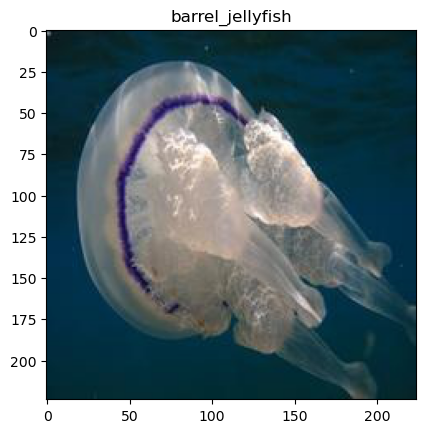

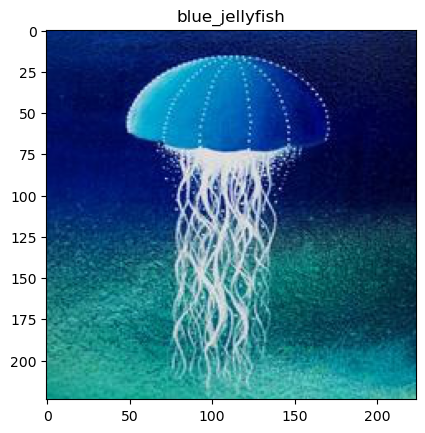

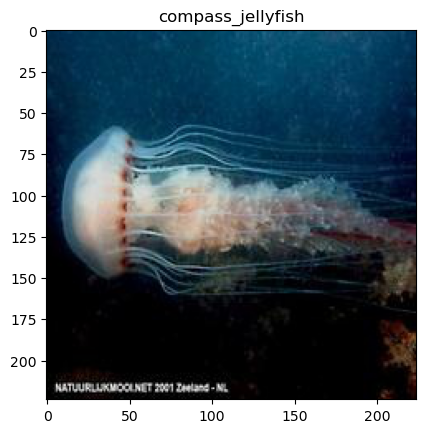

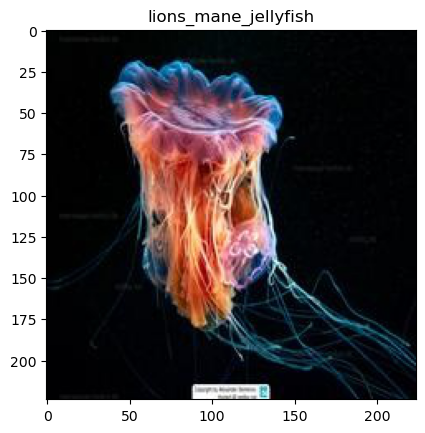

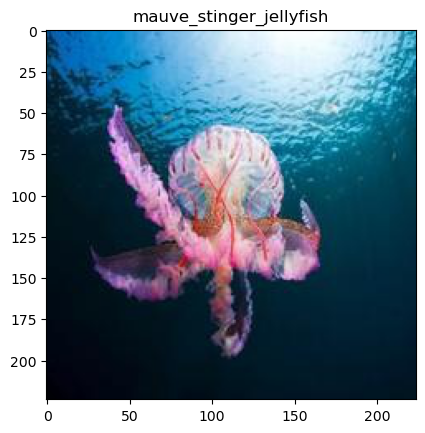

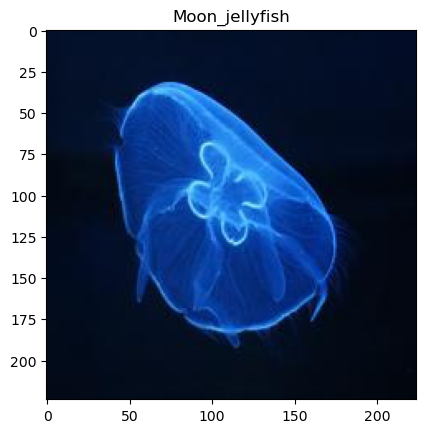

In [6]:
img_list=[0,7,13,20,32,39]
for i in img_list:
    file_path = data_test['File_Path'][i]
    image=mpimg.imread(file_path)
    plt.title(data_test['Label'][i])
    plt.imshow(image)

In [7]:
model = Sequential()

model.add(Conv2D(filters=32, activation='relu', input_shape=(224,224,3))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,activation='relu')
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, activation='relu')
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(6, activation='softmax')

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 128)      

In [8]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [12]:
datagen = ImageDataGenerator(shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

train_data = datagen.flow_from_directory(TRAIN_DIR,target_size = (224,224))

valid_data = datagen.flow_from_directory(VALID_DIR,target_size = (224,224))

test_data= datagen.flow_from_directory(TEST_DIR,target_size = (224,224))

Found 900 images belonging to 6 classes.
Found 39 images belonging to 6 classes.
Found 40 images belonging to 6 classes.


In [13]:
model_history = model.fit(train_data,validation_data = valid_data,epochs=10,shuffle=True)

Epoch 1/10


29/29 [==============================] - 43s 1s/step - loss: 75.5222 - accuracy: 0.2933 - val_loss: 1.7657 - val_accuracy: 0.3846
Epoch 2/10
29/29 [==============================] - 37s 1s/step - loss: 1.4447 - accuracy: 0.4522 - val_loss: 1.8806 - val_accuracy: 0.3590
Epoch 3/10
29/29 [==============================] - 38s 1s/step - loss: 2.2396 - accuracy: 0.4444 - val_loss: 6.5806 - val_accuracy: 0.2564
Epoch 4/10
29/29 [==============================] - 37s 1s/step - loss: 1.6638 - accuracy: 0.4622 - val_loss: 1.6171 - val_accuracy: 0.4359
Epoch 5/10
29/29 [==============================] - 38s 1s/step - loss: 2.6609 - accuracy: 0.4778 - val_loss: 1.8295 - val_accuracy: 0.4615
Epoch 6/10
29/29 [==============================] - 38s 1s/step - loss: 1.7114 - accuracy: 0.5244 - val_loss: 2.3011 - val_accuracy: 0.3846
Epoch 7/10
29/29 [==============================] - 37s 1s/step - loss: 2.6610 - accuracy: 0.5289 - val_loss: 1.7398 - val_accuracy: 0.5128
Epoch 8/10
29/29 

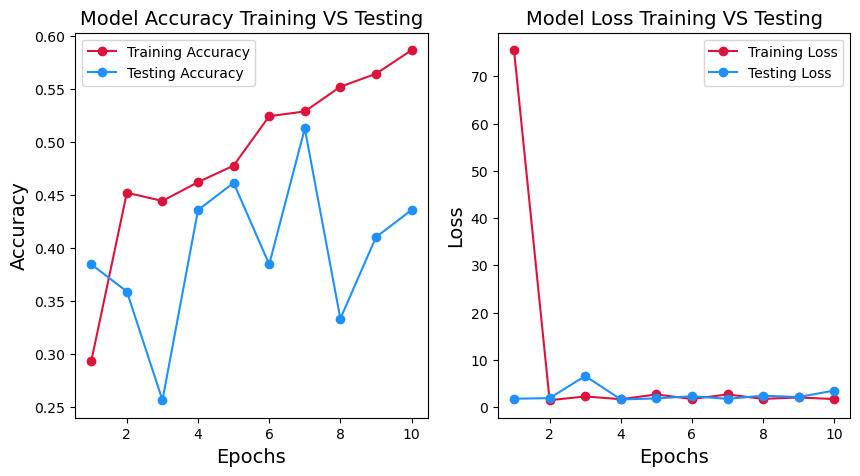

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
# Accuracy Graph
axes[0].plot(range(1, 11), model_history.history['accuracy'], linestyle = 'solid', marker = 'o', color = 'crimson', label = 'Training Accuracy')
axes[0].plot(range(1, 11), model_history.history['val_accuracy'], linestyle = 'solid', marker = 'o', color = 'dodgerblue', label = 'Testing Accuracy')
axes[0].set_xlabel('Epochs', fontsize = 14)
axes[0].set_ylabel('Accuracy',fontsize = 14)
axes[0].set_title('Model Accuracy Training VS Testing', fontsize = 14)
axes[0].legend(loc = 'best')

#Loss Graph
axes[1].plot(range(1, 11), model_history.history['loss'], linestyle = 'solid', marker = 'o', color = 'crimson', label = 'Training Loss')
axes[1].plot(range(1, 11), model_history.history['val_loss'], linestyle = 'solid', marker = 'o', color = 'dodgerblue', label = 'Testing Loss')
axes[1].set_xlabel('Epochs', fontsize = 14)
axes[1].set_ylabel('Loss',fontsize = 14)
axes[1].set_title('Model Loss Training VS Testing', fontsize = 14)
axes[1].legend(loc = 'best')

In [16]:
model.evaluate(valid_data)

2/2 [==============================] - 2s 235ms/step - loss: 3.6776 - accuracy: 0.4359


[3.6776037216186523, 0.43589743971824646]

In [17]:
ypred = model.predict(valid_data)

valid_list = valid_data.classes.tolist()

ypred_class = np.argmax(ypred,axis=1)
ytest = valid_list

2/2 [==============================] - 2s 193ms/step


In [18]:
tags={0:'barrel_jellyfish',
     1:'blue_jellyfish',
     2:'compass_jellyfish',
     3:'lions_mane_jellyfish',
     4:'mauve_stinger_jellyfish',
     5:'Moon_jellyfish',
    }
tag_list=[]
for i in tags:
    tag_list.append(tags[i])
tag_list

['barrel_jellyfish',
 'blue_jellyfish',
 'compass_jellyfish',
 'lions_mane_jellyfish',
 'mauve_stinger_jellyfish',
 'Moon_jellyfish']

Text(0.5, 1.0, 'Confusion Matrix')

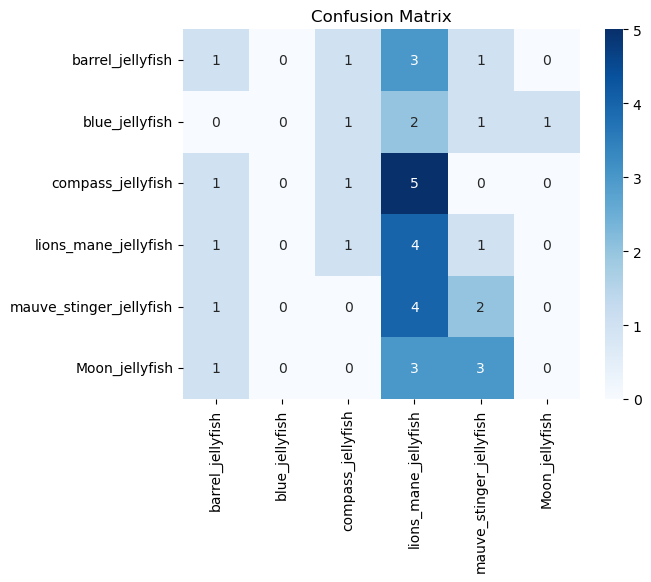

In [19]:
cm=confusion_matrix(ytest,ypred_class)
sns.heatmap(cm,cmap='Blues',fmt='g',annot=True,xticklabels=tag_list,yticklabels=tag_list)
plt.title('Confusion Matrix')

In [20]:
print(classification_report(ytest,ypred_class))

              precision    recall  f1-score   support

           0       0.20      0.17      0.18         6
           1       0.00      0.00      0.00         5
           2       0.25      0.14      0.18         7
           3       0.19      0.57      0.29         7
           4       0.25      0.29      0.27         7
           5       0.00      0.00      0.00         7

    accuracy                           0.21        39
   macro avg       0.15      0.19      0.15        39
weighted avg       0.15      0.21      0.16        39



C:\Users\aakha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aakha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aakha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


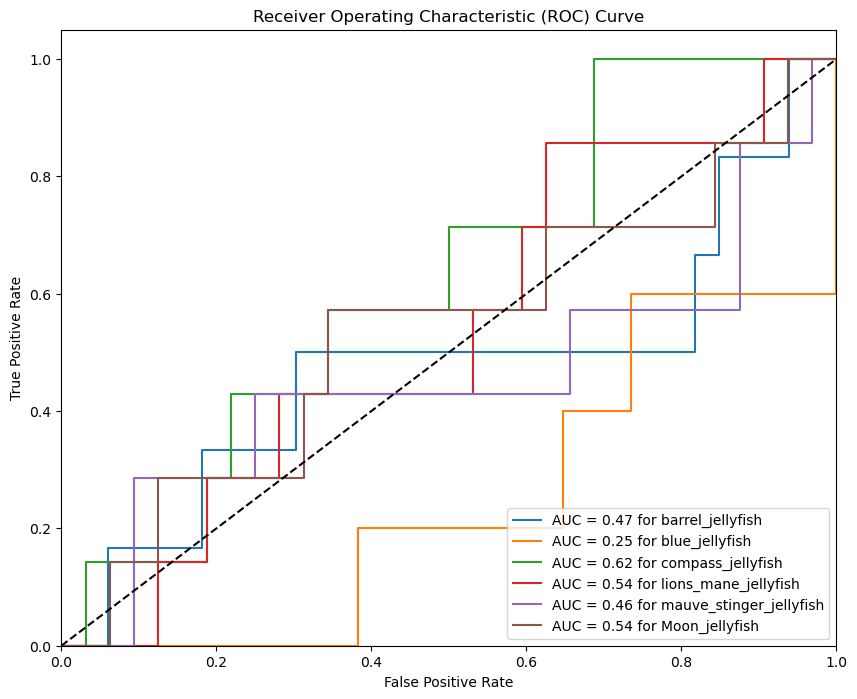

In [21]:
# Convert class labels to binary format for each class
ytest_bin = to_categorical(ytest, num_classes=6)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(ytest_bin[:, i], ypred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(6):
    plt.plot(fpr[i], tpr[i], label=f'AUC = {roc_auc[i]:.2f} for {tags[i]}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()